In [1]:
import os
from pathlib import Path

In [2]:
isee_datapath = Path("/mnt/obsdata/isee_nlfff_v1.2/12673")

In [6]:
filelist = sorted([x for x in isee_datapath.glob('*.nc')])

In [8]:
import netCDF4
import numpy as np

def load_b(nc_file):
    nc=netCDF4.Dataset(nc_file, 'r')
    
    nc_bx=nc.variables['Bx']
    bx=nc_bx[:].transpose(2,1,0)
    nc_by=nc.variables['By']
    by=nc_by[:].transpose(2,1,0)
    nc_bz=nc.variables['Bz']
    bz=nc_bz[:].transpose(2,1,0)

    b = np.stack([bx, by, bz])
    b = np.array(b)
    return b

In [9]:
b = load_b(filelist[0])

In [15]:
b.shape

(3, 513, 257, 257)

In [39]:
import torch

In [140]:
input_data = b[:, :, :, 0]
input_data = input_data[:, :, :, None]
input_data = torch.Tensor(input_data)
output_data = b[:, :, :, :50]
output_data = output_data
output_data = torch.Tensor(output_data)

In [141]:
input_data.shape

torch.Size([3, 513, 257, 1])

In [142]:
output_data.shape

torch.Size([3, 513, 257, 50])

In [143]:
import torch.nn as nn 
import torch.nn.functional as F

In [208]:
# (C, D, H, W)
m = nn.Conv3d(in_channels=3, out_channels=3, kernel_size=(3, 3, 2), stride=(1, 1, 1), padding=(1, 1, 1))

In [209]:
input_data = torch.Tensor(input_data)

In [210]:
mm = m(input_data)

In [211]:
mm.shape

torch.Size([3, 513, 257, 2])

In [212]:
import matplotlib.pyplot as plt

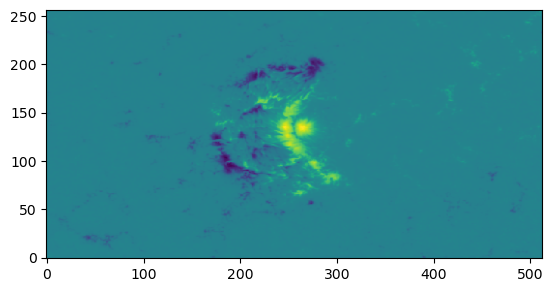

In [214]:
plt.imshow(input_data[2, :, :, 0].T, origin='lower')

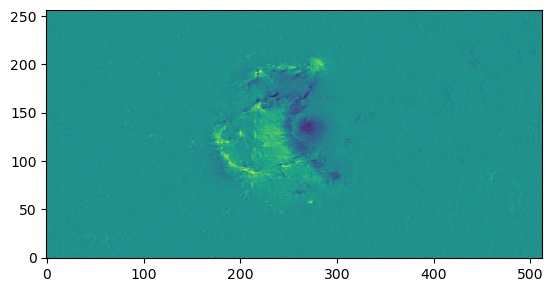

In [213]:
plt.imshow(mm.detach().numpy()[2, :, :, 0].T, origin='lower')

In [219]:
mm = m(mm)

In [221]:
mm.shape

torch.Size([3, 513, 257, 5])

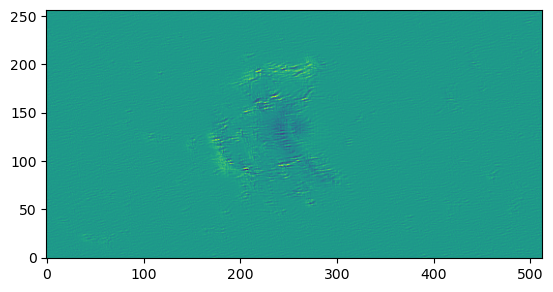

In [220]:
plt.imshow(mm.detach().numpy()[2, :, :, 0].T, origin='lower')

In [234]:
k = nn.MaxPool3d(kernel_size=(2, 2, 1), stride=(2, 2, 1), padding=(0, 0, 0))

In [235]:
kk = k(mm)

In [236]:
kk.shape

torch.Size([3, 256, 128, 5])

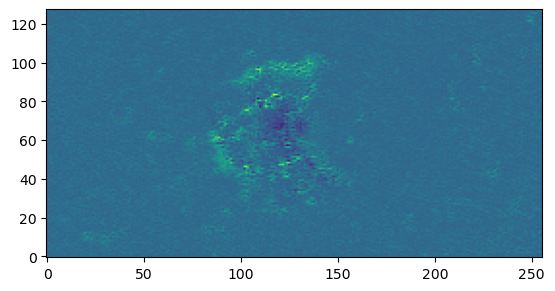

In [237]:
plt.imshow(kk.detach().numpy()[2, :, :, 0].T, origin='lower')

In [244]:
kk = k(kk)

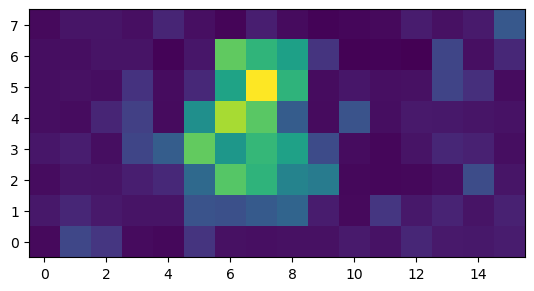

In [245]:
plt.imshow(kk.detach().numpy()[2, :, :, 0].T, origin='lower')

In [246]:
kk.shape

torch.Size([3, 16, 8, 5])

In [268]:
p = nn.ConvTranspose3d(in_channels=3, out_channels=3, kernel_size=(2, 2, 3), stride=(2, 2, 1), padding=(0, 0, 1))

In [269]:
pp = p(kk)
pp.shape

torch.Size([3, 32, 16, 5])